# Homework 6

TFCB 2024

Due date: Nov 14, 2024

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [9]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks biomaRt::select()



## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!`       
#This is a logical operator that means "NOT". Combined with =, != means 'not equals to'. Source: https://www.codecademy.com/resources/docs/r/operators


2. `colnames()` 
#This is a base R function that retrieved the names of the columns in a dataframe, where the df is the argument. It can also be used to designate column names using the assignment operator <- .   Source: https://www.codecademy.com/resources/docs/r/data-frames/colnames


3. `is.na` 
#This is a base R function which is used to detect missing data, which in R is coded as NA. the is.na() function can be applied to a vector or data frame and will tell us whether is element in that list of values is NA or not, returning a TRUE or FALSE result for each value. Can be used to count the number of NA values, or combined with other operations to filter out NA values.    Source: https://www.educative.io/answers/what-is-isna-function-in-r

4. `is.numeric`
#This is a base R functions which test whether an object (such as vector or data frame) is coded as the data type 'numeric' (eitehr interger or decimal/float). The functions returns a TRUE or FLASE output - if even one element in the object is a character, output will be FALSE.   Source: https://www.educative.io/answers/what-is-the-isnumeric-function-in-r


5. `anti_join`   #syntax: anti_join(df1, df2, by = column)
#This is a dplyr package function which returns all rows from df1 that DO NOT have a match in df2 based on the values in a specific column. For example, if df1 and df2 are both lists of genes with count values, and we want to find the genes that are unique to df1 and do not occur in df2, we would use anti_join(x, y, by = gene).  Source: https://dplyr.tidyverse.org/reference/filter-joins.html

6. `desc`
#Part of the dplyr package, often used inside the arrange() function to sort values in descending order (largest to smallest), such as data %>% arrange(desc(column_name)).  Source: https://dplyr.tidyverse.org/reference/desc.html

7. `dplyr::slice`
#The slice() function in dplyr lets you select rows based on their position or row number (unlike filter() which selects based on the values of interest). For example, if we wanted to take the first 100 rows of a data frame regardless of the values in the columns we would do df%>% slice(1:100).  Source: https://dplyr.tidyverse.org/reference/slice.html


8. `dplyr::across`
#The across() function in dplyr allows us to apply the same operation to multiple columns at once. Across() is often used inside other functions like mutate() to designate which columns we want to apply the outer function to. Source: https://dplyr.tidyverse.org/reference/across.html




## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [71]:
library(biomaRt)  #loads the package biomaRt which is used for accessing genome databased such as ensembl and searching it
#here, we will retrieve human genes from the ensembl database,
#now we need to establish a connection to the database that have certain information (metadata) encoded in the database
mart <- useMart('ensembl', dataset = 'hsapiens_gene_ensembl')  #specifies the database we want to use (ensembl) and which genome we want
#mart <- useDataset(“hsapiens_gene_ensembl”, mart) 
annotations <- getBM(
  mart = mart,  #call the mart object from earlier to establish connection with database
  attributes = c('ensembl_gene_id', 'hgnc_symbol', 'ccds'),  #specifies what information about the genes we want to retrieve
  uniqueRows = TRUE) %>%  #makes sure there aren't any duplicate genes
  rename(ccds_id = `ccds`) %>% #renames the Consensus Coding Sequence ID column
  filter(ccds_id != '')  #only leaves columns where the ID is not blank
  #print()   #prints the output, but the output is VERY long so instead I will only print a few lines
  head(annotations)

,ensembl_gene_id,hgnc_symbol,ccds_id
,<chr>,<chr>,<chr>
1,ENSG00000169789,PRY,CCDS14799
2,ENSG00000114374,USP9Y,CCDS14781
3,ENSG00000169807,PRY2,CCDS35482
4,ENSG00000198692,EIF1AY,CCDS14795
5,ENSG00000198692,EIF1AY,CCDS65368
6,ENSG00000183753,BPY2,CCDS14800


In [34]:
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%  
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
  print()

Rows: 63677 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 63,677 × 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <db

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

### First approach: adding density contour lines ###

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 43031 rows containing non-finite values (stat_density2d).”


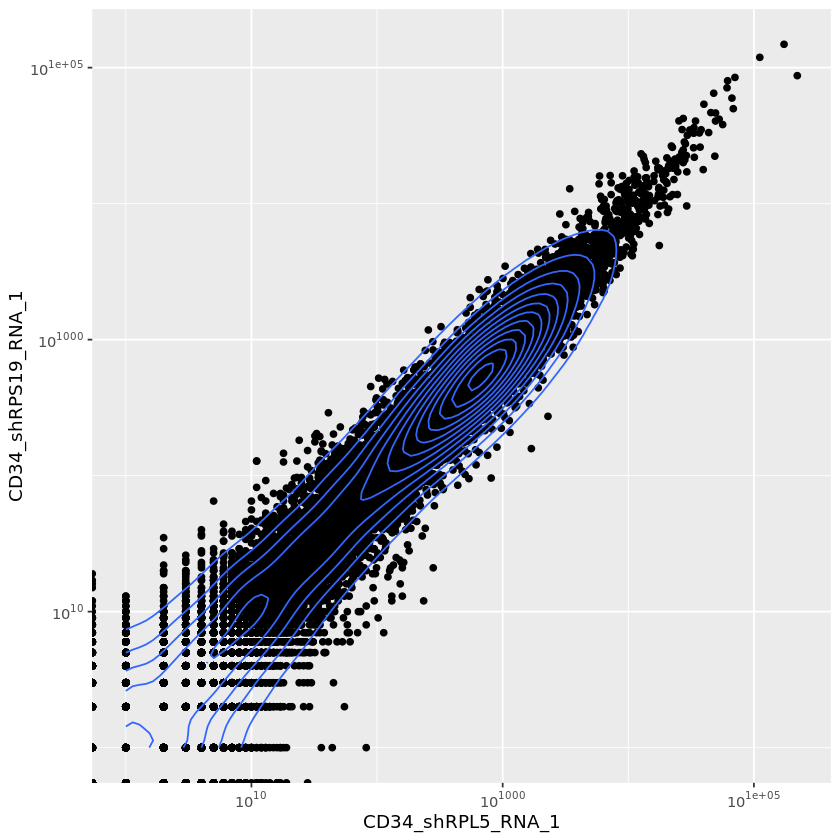

In [35]:
library(scales)
data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  scale_x_log10(labels = math_format(10^.x)) +  # Log10 scale for x-axis
  scale_y_log10(labels = math_format(10^.x)) +  # Log10 scale for y-axis
  geom_point() + #adds individual points
  geom_density2d()   # Add density contours

### Second approach: using colors to show point density ###

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 43031 rows containing non-finite values (stat_bin2d).”


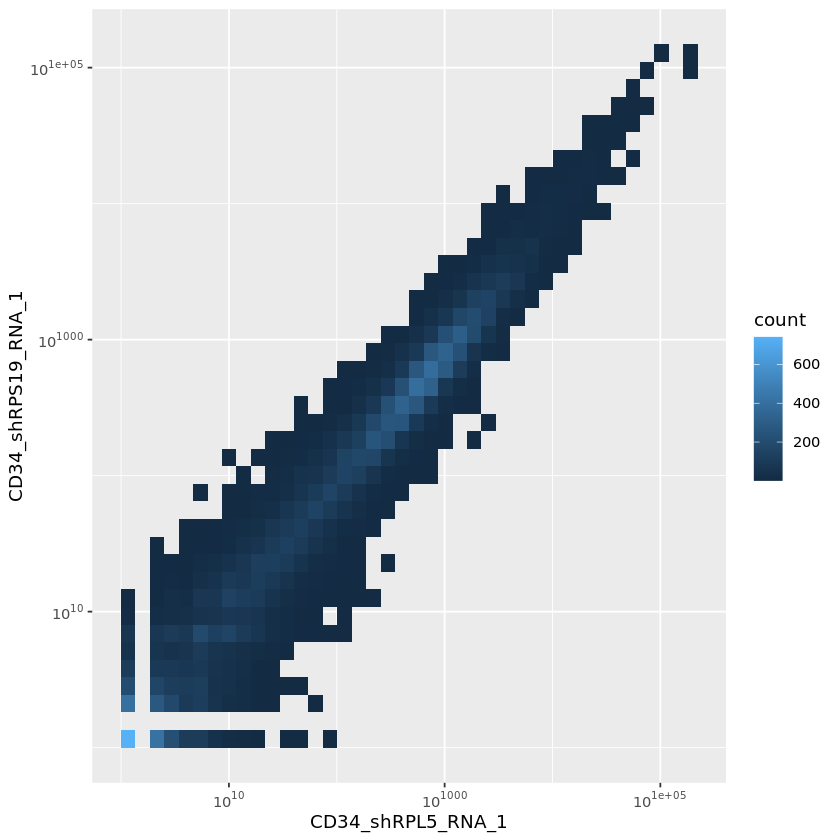

In [36]:
library(scales)
data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  geom_bin2d(bins = 40) + #assigns colors to squares based on point density in that square
  scale_x_log10(labels = math_format(10^.x)) +  # Log10 scale for x-axis
  scale_y_log10(labels = math_format(10^.x))    # Log10 scale for y-axis
  
  

**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [37]:
data <- data %>% select(ensembl_gene_id, matches("RPL5|RPS19|Luc"))
head(data)
dim(data)

ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,40,49,6,3,20,25,0,2,84,86,22,12
ENSG00000000005,0,0,0,0,1,0,0,0,3,0,0,0
ENSG00000000419,1116,1000,101,249,691,675,212,133,1030,1206,220,144
ENSG00000000457,149,126,14,22,185,225,40,20,153,128,14,17
ENSG00000000460,289,268,52,106,152,237,77,40,364,425,143,57
ENSG00000000938,204,145,17,13,412,403,31,30,8,8,0,0


[1] 63677    13

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [38]:
data <- data %>%  filter(across(-1, ~ . >= 50)) #selects all the columns except the first, which is not numeric
head(data) 
dim(data) #This shows us that filtering out all rows with any value below 50 got rid of a large amount of genes
#instead of 63k rows (genes), we are left with 4.2k genes.

Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,1116,1000,101,249,691,675,212,133,1030,1206,220,144
ENSG00000001036,1487,936,182,295,800,752,148,136,913,854,189,183
ENSG00000001084,1036,1224,134,275,558,817,169,95,1479,1656,220,174
ENSG00000001497,1436,1231,253,367,885,1016,195,137,1647,2118,594,392
ENSG00000002549,1228,1186,285,447,693,897,260,229,1537,1668,459,272
ENSG00000002586,2746,1600,260,395,2570,1989,379,258,819,811,166,112


[1] 4239   13

## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [39]:
data <- data %>%
  mutate(across(-1 , ~ . / median(., na.rm = TRUE)))

head(data)

ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.8169839,0.8319468,0.6196319,0.8956835,0.6748047,0.5968170,1.0495050,0.8471338,0.7692308,0.8198504,0.8661417,0.8571429
ENSG00000001036,1.0885798,0.7787022,1.1165644,1.0611511,0.7812500,0.6648983,0.7326733,0.8662420,0.6818521,0.5805574,0.7440945,1.0892857
ENSG00000001084,0.7584187,1.0183028,0.8220859,0.9892086,0.5449219,0.7223696,0.8366337,0.6050955,1.1045556,1.1257648,0.8661417,1.0357143
ENSG00000001497,1.0512445,1.0241265,1.5521472,1.3201439,0.8642578,0.8983201,0.9653465,0.8726115,1.2300224,1.4398368,2.3385827,2.3333333
ENSG00000002549,0.8989751,0.9866889,1.7484663,1.6079137,0.6767578,0.7931034,1.2871287,1.4585987,1.1478715,1.1339225,1.8070866,1.6190476
ENSG00000002586,2.0102489,1.3311148,1.5950920,1.4208633,2.5097656,1.7586207,1.8762376,1.6433121,0.6116505,0.5513256,0.6535433,0.6666667


## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [46]:
lfc <- data %>%
  mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) / (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2))) %>%  #missing paranthesis
  mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) / (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2))) %>%  #missing paranthesis
  mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) / (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>%  #missing underscore in CD34_shLuc_RNA_2, missing paranthesis
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%  #forgot to select the schluc variable we are using later
  mutate(lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te),                  #removed the extra =, since == is comparison and not assignment
         lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te)) %>%  print()

# A tibble: 4,239 × 6
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te lfc_te_rpl5
   <chr>                  <dbl>         <dbl>         <dbl>       <dbl>
 1 ENSG00000000419        0.919         1.49          1.08       -0.239
 2 ENSG00000001036        1.17          1.11          1.45       -0.316
 3 ENSG00000001084        1.02          1.14          0.853       0.258
 4 ENSG00000001497        1.38          1.04          1.75       -0.338
 5 ENSG00000002549        1.78          1.87          1.50        0.245
 6 ENSG00000002586        0.903         0.825         1.14       -0.331
 7 ENSG00000002834        0.479         0.394         0.519      -0.115
 8 ENSG00000003056        1.87          1.87          1.02        0.882
 9 ENSG00000003393        0.831         1.20          0.462       0.847
10 ENSG00000003402        0.505         0.427         0.344       0.552
# … with 4,229 more rows, and 1 more variable: lfc_te_rps19 <dbl>


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [47]:
head(lfc)

ensembl_gene_id,mean_rpl5_te,mean_rps19_te,mean_shluc_te,lfc_te_rpl5,lfc_te_rps19
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.9189685,1.4915118,1.0844534,-0.2388808,0.4598073
ENSG00000001036,1.1662489,1.1056371,1.4522864,-0.3164503,-0.3934480
ENSG00000001084,1.0194588,1.1376461,0.8527277,0.2576465,0.4158948
ENSG00000001497,1.3839893,1.0427670,1.7498735,-0.3384179,-0.7468339
ENSG00000002549,1.7799459,1.8680181,1.5015090,0.2454203,0.3150953
ENSG00000002586,0.9026121,0.8245621,1.1351996,-0.3307679,-0.4612458


In [49]:
#I don't work with shRNA knockdowns so it's a little confusing exactly what the instructions want me to average.
#It seems like the insructions want me to average the last two columns (lfc_te_rpl5 and lfc_te_rps19)
#I don't really understand, biologically/scientifically speaking, why it makes sense to average these values
# but that's the only thing I can think of to fulfill the instructions.
mean_lfc <- lfc %>% mutate(avg_lfc = (lfc_te_rpl5 + lfc_te_rps19) / 2) %>% select(ensembl_gene_id, avg_lfc)


In [50]:
head(mean_lfc)

ensembl_gene_id,avg_lfc
<chr>,<dbl>
ENSG00000000419,0.1104632
ENSG00000001036,-0.3549491
ENSG00000001084,0.3367707
ENSG00000001497,-0.5426259
ENSG00000002549,0.2802578
ENSG00000002586,-0.3960069



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [53]:
mean_lfc <- inner_join(mean_lfc, annotations, by = "ensembl_gene_id")  
#I assume we want ONLY genes for which annotations exist AND we have data on, so I'm uisng inner_join


In [54]:
head(mean_lfc)

ensembl_gene_id,avg_lfc,hgnc_symbol,ccds_id
<chr>,<dbl>,<chr>,<chr>
ENSG00000000419,0.1104632,DPM1,CCDS82628
ENSG00000000419,0.1104632,DPM1,CCDS13434
ENSG00000000419,0.1104632,DPM1,CCDS93059
ENSG00000001036,-0.3549491,FUCA2,CCDS5200
ENSG00000001084,0.3367707,GCLC,CCDS4952
ENSG00000001084,0.3367707,GCLC,CCDS75471


## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

In [69]:
bottom10 <- mean_lfc %>%
  arrange(avg_lfc) %>%  # Sort by avg_lfc in ascending order (smallest to largest)
  slice_head(n = 10)    # keep only the first 10 rows


In [61]:
print(bottom10)
class(bottom10)

# A tibble: 10 × 4
   ensembl_gene_id avg_lfc hgnc_symbol ccds_id  
   <chr>             <dbl> <chr>       <chr>    
 1 ENSG00000180573   -2.95 H2AC6       CCDS4585 
 2 ENSG00000197903   -2.79 H2BC12      CCDS4621 
 3 ENSG00000115268   -2.27 RPS15       CCDS12067
 4 ENSG00000115268   -2.27 RPS15       CCDS77210
 5 ENSG00000176340   -2.02 COX8A       CCDS8054 
 6 ENSG00000105640   -2.01 RPL18A      CCDS12367
 7 ENSG00000137818   -2.01 RPLP1       CCDS10234
 8 ENSG00000137818   -2.01 RPLP1       CCDS10233
 9 ENSG00000188486   -1.86 H2AX        CCDS8410 
10 ENSG00000197728   -1.85 RPS26       CCDS31832


[1] "tbl_df"     "tbl"        "data.frame"

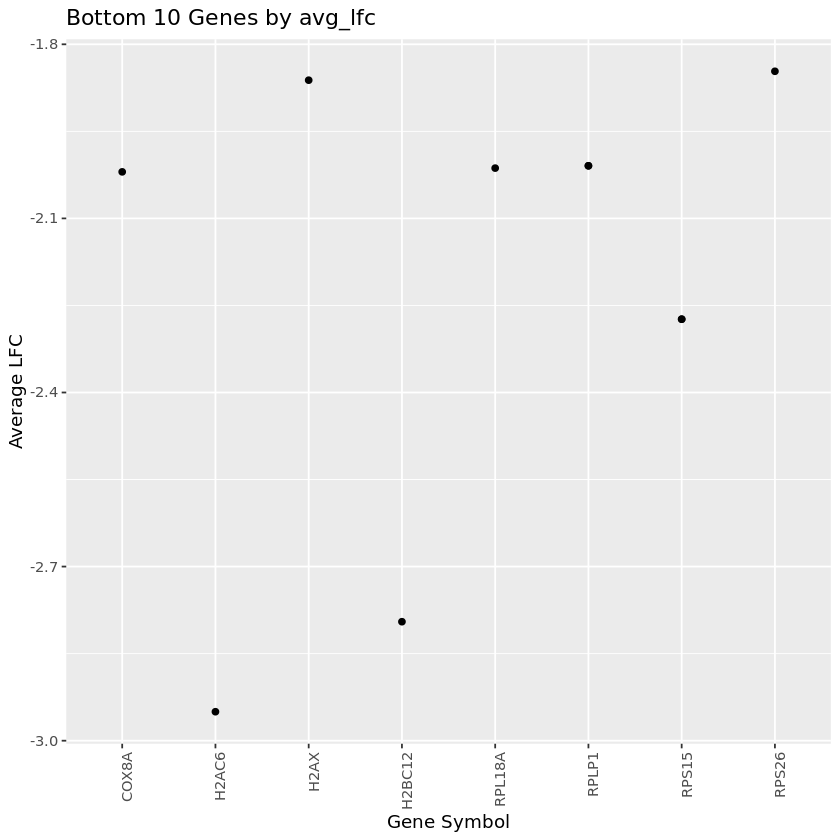

In [65]:
#I'm not sure which one is supposed to be the "gene name" and why it's different from the "gene symbol"

ggplot(bottom10, aes(x = hgnc_symbol, y = avg_lfc)) + 
  geom_point() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + # Rotate x-axis labels for better readability
  labs(title = "Bottom 10 Genes by avg_lfc", x = "Gene Symbol", y = "Average LFC")  


### I improved the first graph by ordering the genes by their lfc values, instead of in alphabetical order as was default. Since we are just trying to show gene names and values, and we don't have any scientific basis to plot a trend line or regression line, or to connect the points with a line, I think just a simple point plot is best here. A bar plot would have also worked. ###

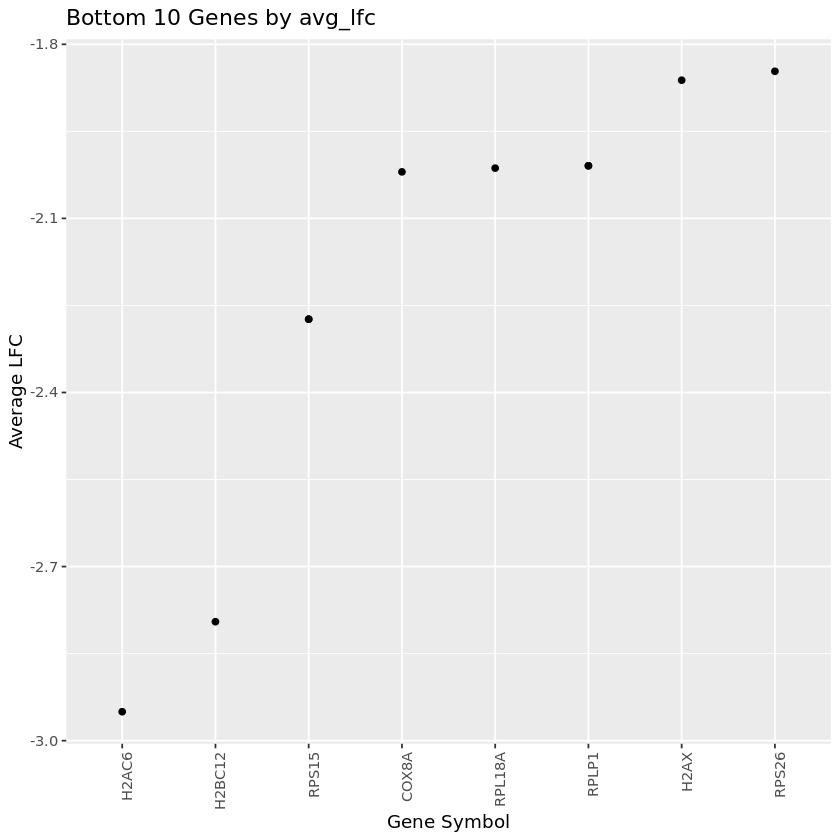

In [70]:


ggplot(bottom10, aes(x = reorder(hgnc_symbol, avg_lfc), y = avg_lfc)) + 
  geom_point() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + # Rotate x-axis labels for better readability
  labs(title = "Bottom 10 Genes by avg_lfc", x = "Gene Symbol", y = "Average LFC")  
